# Tutorial 11: Solving Maxwell's equations for electromagnetic waves using FDTD
In this tutorial, we will dive one step deeper into Finite Difference methods, by applying them to the propagation of electromagnetic waves. Such waves consist of an oscillating electric field $E$ and a magnetic field $H$ - the variation in one field generates the other field. This means that you will solve coupled, time-dependent differential equations using the Finite Differences Time-Domain method. 


<figure>
<center>
<img src="https://lh3.googleusercontent.com/NDF2gPJrTCJFUnE4ebuPYfpkGh9uFHjB2QqYfrIVExnTrolIlIE4cN7PgeJp6unnS5D2Q5E2Qlwm94hqnjMD2CIUNBv4qLlwZHCWHnfXlzNjc6IFwFyrCDmzhkFyZ-hRYg5QqxunQ6Ho8aHreZONsIBRiN1FBUiQ9sWnabugbXGH3aycodULjrelRX1GjHBw3-dy3RQRwXQUDZoeL6Ug-Sjbg3SyvFcd-444i2lzX8RXpBKOj9ML7b26rIhAQUdjJx_Ub2_WNXF9H6MhxREtW4BfEMzrmUpbCO_SNYsaTn8_i7HC6QYZ4XtAnECNzciP5BCykYYTs8Cg466u9qDTHktM93TpEdoR4v8KXalcikYBElh8PRCTFWLieaYMgzxOihJXKZgVT2G1f8IPDn9steUzUvxAcyJtUjn5LcdxpFl2ivedmjkVF2N9belu9lGJBc5WDCnIK6knHfjr6JT99BGaqWUsKiHFTN_Xyn3-ah4gUNPO8_MsKl-9QeExmLJgptOYfk49owrQGiT2QTKT22TxloYlcP-s3kjiPjC7DBgtgUNMkgSpYqsK3xnKvgFanZx400fjG42CWGyjRmBhnWuhDDaZgyOKu9RDS_pkm8bOnsnEXbE54DfHYu94FGcDWD1k1nVBQJceXVLuA_C7JMStMeC9srtlv7Vb9kQikT-j-fjhAPOJMS7ZIgE7kJz-6eqyDUEAHLDMN5VnH04qrOv4RdnoUjOF5JZb3MjIuPZSi14=w1602-h840-no" width="480px" title="EM wave" alt="Figure 1">
<figcaption>
<b>Figure 1.</b>
<i>An electromagnetic wave propagating in time, traveling in the $z$-direction. The electrical and magnetic fields oscillate in orthogonal planes.  </i></figcaption>
</center>
</figure>




### Preliminary work:
1. Read section 22.5 carefully. Make sure that you can answer the following questions for yourself:
    - Of which components does an electromagnetic wave consist?
    - What governs the direction of the electromagnetic wave?
    - Why do we need a different algorithm for solving Maxwell's equations in time?
2. Follow and reproduce the derivation of the discretized Maxwell's equations outlined in Part 1 below, and in the book in paragraph 22.5.




## Part 1: deriving the algorithms

Solving Maxwell's equations for a propagating wave requires the use of a more sophisticated FD algorithm. You will solve for the propagation of the EM-wave in the positive $z$-direction, where the electrical field $E_x(z,t)$ will point in the $x$-direction and the magnetic field $H_y(z,t)$ in the $y$-direction (see Figure 1).

\begin{array}{l}{\mathbf{\nabla} \cdot \mathbf{E}=0 \quad \Rightarrow \quad \frac{\partial E_{x}(z, t)}{\partial x}=0} \\ {\mathbf{\nabla} \cdot \mathbf{H}=0 \quad \Rightarrow \quad \frac{\partial H_{y}(z, t)}{\partial y}=0} \\ {\frac{\partial \mathbf{E}}{\partial t}=+\frac{1}{\epsilon_{0}} \mathbf{\nabla} \times \mathbf{H} \quad \Rightarrow \quad \frac{\partial E_{x}}{\partial t}=-\frac{1}{\epsilon_{0}} \frac{\partial H_{y}(z, t)}{\partial z}} \\ {\frac{\partial \mathbf{H}}{\partial t}=-\frac{1}{\mu_{0}} \mathbf{\nabla} \times \mathbf{E} \quad \Rightarrow \quad \frac{\partial H_{y}}{\partial t}=-\frac{1}{\mu_{0}} \frac{\partial E_{x}(z, t)}{\partial z}}\end{array}

Now, again, the underlying technique consists of applying a central difference approximation to the underlying differential equations. For the time-dependence of the electrical field we have:

$$ \frac{\partial{E}_x}{\partial{t}}=-\frac{1}{\epsilon_0}\frac{\partial{H}_y(z,t)}{\partial{z}}\,,$$

where $E_x$ is the $x$-component (and only component) of the electrical field, $\epsilon_0$ the vacuum permittivity and $H_y$ the magnetic field's $y$-component.
Likewise, for the magnetic field we have:
$$ \frac{\partial{H}_y}{\partial{t}}=-\frac{1}{\mu_0}\frac{\partial{E}_x(z,t)}{\partial{z}}\,,$$

where $\mu_0$ is the magnetic permeability of free space.

The discretization of these equations is not trivial, since an interdependence of the electrical field on the magnetic field (and vice versa) exists.

1.  The solution is therefore to use an intermixed space-time grid (see figure below), dicretized in half-time and half-space steps. You can derive the update rules for Maxwell's equations by performing the following steps, which are also outlined in eqs. 22.48-22.53 in the book:
    - Apply the central differences approximation to the time, and the spatial derivatives in the above definitions for $\frac{\partial{H}_y}{\partial{t}}$ and $\frac{\partial{E}_x}{\partial{t}}$: **try this yourself!** 
    - For the magnetic field, use integer time steps, and half-integer space steps, and for the electric field use half-integer time teps, and integer space steps. 
    - Introduce a normalization factor $E'=\sqrt{\frac{\epsilon_0}{\mu_0}}E$ such that we can simplify the equations further.
    - You should end up with (we dropped the accent on $E'$):

$$ E_x^{k,n+1/2}=E_x^{k,n-1/2}+\beta(H_y^{k-1/2,n}-H_y^{k+1/2,n})\,,$$

$$ H_y^{k+1/2,n+1}=H_y^{k+1/2,n}+\beta(E_x^{k,n+1/2}-E_x^{k+1,n+1/2})\,,$$ with $\beta=\frac{c}{\Delta{z}/\Delta{t}}$ and $c=\frac{1}{\sqrt{\epsilon_o\mu_0}}$.

<figure>
<center>
<img src="https://lh3.googleusercontent.com/I9xz-XRZh3wKP1bRikqoI5sRl9UnY7Hb8d5T0uFL8yqgxLBZl8gYTZX7htFSqStJTOSliCfz4Ovy-K800lynB1F5ws_MqjxPF6NA0-b6sClHfzVnloKEHehhLCuFmLKmtmyWER-gRFTZPr4OTIcxpfLvva0gUYCBlgY1CgQF3flCKJjlxogF8eTFGMkXS3gSCEaIfMw_EbquKXF_5PjGd4qyU6I9fYOx2Npa8xdbEMiudT5W5YcQRB8eENb8vjZGGHhIRuodA9Pvqm-iV5bPAcCXF_C8XAdSwicpzwkb4qsoAtFT2qx77EHocbgcV2ra3xZ_eYTMHQvOTE6jU8NW4z-TPT-QRtAliGL0ntaQCapjQEXrBb36rP1dUYtosPNMd0d2GoZVTEdr9iXcKnR595_BhGOZzpf43I6olwlb_UwRmgP098fqYO3qotQ5tHIKUfh903TvQfmBS8-w5Z-wFoX0o5qSNMsBwXN6B4UaOVc8V0coZrd6RMjsOP4nRMUmp_VPhYNR8hHkQgV4eWZ0WTem89pyGQ3yrNSdbNf0fmdmdzUt8-yeNk9b8d5qnaEdr2uncd2vY4hLoglOZ8LOUozC-oV_UazZ60NqHdrPgf2U6lbLTNvVwwGFJ0hGVz_dGYAvKAYncH1TkxfkTZ1G1hK6ZBeqg54hfVKck8pNLS8aB50HhyhI6C1A3a1nzSgZ_Sm2v-XbFgrHoq6PWCGy-IIY7iN8kEq7RJ3IDsY_1M9906s=w1400-h978-no" width="480px" title="Discretization" alt="Figure 2">
<figcaption>
<b>Figure 2.</b>
<i> In the space-time discretization for this algorithm, we need
 half-integer time steps as well as half-integer space steps. On this grid, we solve the magnetic field at integer time sites and half-integer space sites, and the Electric field at half-integer time sites and integer space sites.  </i></figcaption>
</center>
</figure>



### Progamming tasks and questions
_Note: although you might be tempted to use the code from the listings in the book rather than programming the lines yourself, this will not work for this assignment._ 

1. **Writing the initial conditions**: Assume that $\Delta{x}$ is set to 1 throughout. Initialize variables (using `np.array()`) that contain $E_x$ and $H_y$, and apply the following initial conditions: 
    - $E_x(z,t=0)=\sin{(2\pi{z}/{(0.1*N_z})}$,
    - $H_y(z,t=0)=\sin{(2\pi{z}/{(0.1*N_z)})}$.
    - where $z$ runs from 0 to 200 (make sure to set $N_z$ properly!)

2. Write down for yourself (i.e. in the form of a pseudocode for a function `update(E_x,E_y)`) how you would perform an update of the $E_x$ and $H_y$ solutions. Note that you cannot acccess half-integer indices! You need to access values from both grids separately.
    - It helps to first make a copy of the input `E_x` and `H_y`.
    - Exclude the first and last points of the E and H fields in the general update rule
    - For the first and last points, instead use periodic boundary conditions: this means that the first spacepoint in the solution for $E_x$ is dependent on (for example) the final space point of the solution for $H_y$. If you initialized the electromagnetic wave properly, then a complete number of oscillations fits inside the simulation system.
    - Make sure to use the updated values of $E_x$ to solve $H_y$!
    
3. Set the values of $c$ and $\beta$: use a value of 10 for both permittivities, and choose a time step $\Delta{t}$ of 0.5.

4. Perform some tests on your program. Append the solutions for E and B to a regular `list` and use the supplied visualization cell.


We will now investigate some properties of the simulation system. Check that, using the initial conditions, your simulation is stable. Tune the total number of frames or the framerate (`interval`) in the visualization cell if your animation is slow. If you see any fringes on top of the waves, then these are a consequence of your simulation settings (i.e. check your value of $\beta$). In case you see fringes occurring near the edges of the box (at the periodic boundary), check your implementation of periodic boundary conditions.

5. The propagation direction of the EM-wave is dependent on $\vec{E}\times\vec{H}$. What happens if you: i) turn the $H_y$-field off completely, ii) apply a relative phase of $\pi$ between the $E_x$ and $H_y$-waves? You can test both of these by inserting a different BC.

6. We don't touch the value $\Delta{x}$. However, via our choices of the permittivities and the timestep, we can tune our value of $\beta$. Test the effect of either a very small (towards 0) value of $\beta$, or a value that is larger than 0.5. Can you relate the behavior of your FDTD algorithm for large values of $\beta$ to the FD algorithms you used earlier?


7. As a final investigation, we will add a medium through which the wave will propagate. In essence, a medium is 'just' a region in which the permittivity is different from the vacuum-value.
    - It is more convenient to define a grid with beta-values, based on the local values for the permittivity.
    - Ensure that the dimensions of `beta` correspond to those of `E_field` and `B_field`, and that you call the right elements of `beta` in your `update`-function!
    - Test the above implementation: First, test what happens to your wave propagation if you set the permittivity of the complete medium (via the array with $\beta$-values) to a uniform value that is roughly 10 times higer than used before. Make sure to check whether you need a different $\Delta{t}$-value in order to keep your simulation stable!
    - Now, we define a region in space where the permittivity is a factor 10 higher. To visualize the effect more properly, you can increase the amount of data points in the x-direction. Use for example the region of space where $ 150 < i\Delta{x} < 250 $ holds. How can you interpret the high-$\epsilon$-region, based on your results?
    
9. Make the value of the permittivity vary spatially along the propagation direction, in an oscillating way (use `np.sin()` for example). Use a short period (for example, 10 times shorter  than the poeriod of the original wave). What is the effect of a medium with a periodic permittivity on the propagation of the wave once it exits the medium? Try to vary the frequency of the oscillating permittivity: what happens?


In [40]:
import numpy as np




def init_fields(n_z=200, n_t = 200):
# 𝐸𝑥(𝑧,𝑡=0)=sin(2𝜋𝑧/(0.1∗𝑁𝑧) ,
# 𝐻𝑦(𝑧,𝑡=0)=sin(2𝜋𝑧/(0.1∗𝑁𝑧)).
    z = np.arange(0,n_z)
    E_field = np.zeros((n_z, n_t))
    H_field = np.zeros((n_z, n_t))
    E_field[:,0] = np.sin(2*np.pi*z/(0.1*n_z))
    H_field[:,0] = np.sin(2*np.pi*z/(0.1*n_z))

    return E_field, H_field

def update_EH(E_field_in, H_field_in, beta):
    E_field = E_field_in.copy()
    H_field = H_field_in.copy()
    
    E_field = np.roll(E_field, 1, axis=0) + beta*(np.roll(H_field, 1, axis=1) - H_field)
    H_field = np.roll(H_field, 1, axis=0) + beta*(np.roll(E_field, 1, axis=1) - E_field)
    

    return E_field, H_field
    
       
def run(beta):
    E, H = init_fields()
    
    for _ in range(0,5000):
        E, H = update_EH(E, H, beta)
        
    return E, H

## Questions 1-4

In [41]:
#Question 1-4
e_o= 10
u_o= 10
dt = 0.5
dx = 1
c = 1/np.sqrt(e_o*u_o)
beta = c*dt


E_array, H_array = run(beta)

## Question 5

In [ ]:
#Question 5

#initialize and set the run settings

In [ ]:
# Question 5 p2

def init_fields_q5(n_z=...):

    return E_field, H_field

    
    


## Question 6

In [ ]:
#Question 6: make things blow up!


## Question 7

In [ ]:
#Question 7: using a medium with higher permittivity


E_field,H_field=init_fields(401) #use a longer system!


## Question 8


In [ ]:
#Question 8: using a medium with oscillating permittivity 

    

## Visualization

The below is used to visualize your simulation. The cell requires you to first run your simulation, and assumes that your E and B solutions for each step (which are `np.array`s) were appended to a regular python `list`.

If you use google colab: you can click the pop-up menu to the top-left, and navigate to 'Files'. Here you can download (right mouse button), or pre-view the animation (double-click).

If you run jupyter locally, then you will find the GIF file in the working directory.

MovieWriter pillow unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.


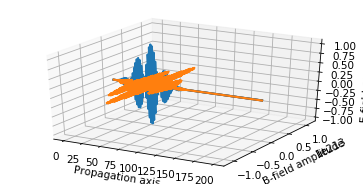

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure(dpi=75,figsize=(6,3))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Propagation axis')
ax.set_ylabel('B-field amplitude')
ax.set_zlabel('E-field amplitude')
e_y=np.zeros(len(E_array[0]))
h_x=np.zeros(len(H_array[0]))


z_axis = np.array([(i)*dx for i in range(len(E_array))]) #E_field
baseline, = ax.plot(z_axis, e_y, lw=2, c='k')
line1, = ax.plot(z_axis, e_y, E_array[0], lw=2, label='$E$')
line2, = ax.plot(z_axis, H_array[0], h_x, lw=2, label='$B$')

def init():
    baseline.set_data([], [])
    baseline.set_3d_properties([])
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    return [baseline, line1, line2]
    
def animate(i):
    # apparently, 3d lines work differently than 2d lines. You have to specify the third dimension separately
    baseline.set_data(z_axis, e_y)
    baseline.set_3d_properties(h_x)
    line1.set_data(z_axis, e_y)
    line1.set_3d_properties(E_array[i][:])
    line2.set_data(z_axis, H_array[i][:])
    line2.set_3d_properties(h_x)
    return [baseline, line1, line2]

anim = animation.FuncAnimation(fig, animate, frames=len(E_array), interval=25) 
anim.save('EM.html', writer='pillow') 




